# Week4 - HW 2

1. Acquire power data (https://www.bmreports.com/bmrs/?q=demand/rollingsystemdemanda) for at least 10 days and not more than 40 days. 

1. Create two bar graphs of the power consumption per hour. 
    a. One bar graph has 24 bars; 
    b. one bar graph has 24 times number of days bars. 

1. Your solution should be committed in your Week04 folder.

Graphs must have appropriate labels and there should not be anything extra cluttering. 

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import math


In [2]:
!head /Users/tej/Desktop/RollingSystemDemand1.csv

HDR,ROLLING SYSTEM DEMAND
VD,20210901000000,22640
VD,20210901000500,22558
VD,20210901001000,22443
VD,20210901001500,22466
VD,20210901002000,22413
VD,20210901002500,22278
VD,20210901003000,22189
VD,20210901003500,22282
VD,20210901004000,22267


In [3]:
!head /Users/tej/Desktop/RollingSystemDemand2.csv

HDR,ROLLING SYSTEM DEMAND
VD,20210908000000,23472
VD,20210908000500,23397
VD,20210908001000,23380
VD,20210908001500,23333
VD,20210908002000,23268
VD,20210908002500,23174
VD,20210908003000,23058
VD,20210908003500,22829
VD,20210908004000,22832


In [4]:
df1= pd.read_csv("/Users/tej/Desktop/RollingSystemDemand1.csv", names =['VD', 'measurement_time', 'demand_level'], skiprows=1, parse_dates = [1])







In [5]:
df2= pd.read_csv("/Users/tej/Desktop/RollingSystemDemand2.csv", names =['VD', 'measurement_time', 'demand_level'], skiprows=1, parse_dates = [1])




In [6]:
#df1

In [7]:
#df2

In [8]:
#print(df1.shape)
#print(df2.shape)

In [9]:
df1=df1.drop(labels=2000)

In [10]:
df2=df2.drop(labels=2000)

In [11]:
frames = [df1, df2,]

df = pd.concat(frames, ignore_index= True)

In [12]:
#df.shape

In [13]:
#df

In [14]:
#df['measurement_time']

In [15]:
len(df)

4000

In [16]:
times = pd.DatetimeIndex(df.measurement_time)
df.groupby([times.hour, times.minute]).demand_level.sum()

measurement_time  measurement_time
0                 0                   321345.0
                  5                   320736.0
                  10                  319953.0
                  15                  319336.0
                  20                  318513.0
                                        ...   
23                35                  279660.0
                  40                  278811.0
                  45                  277933.0
                  50                  277247.0
                  55                  276313.0
Name: demand_level, Length: 288, dtype: float64

In [17]:
#times

In [18]:
avg_demand = df.groupby([times.hour])['demand_level'].mean()
#avg_demand

In [19]:
hour = list(range(0, 24))

print(hour)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


Text(0, 0.5, 'demand')

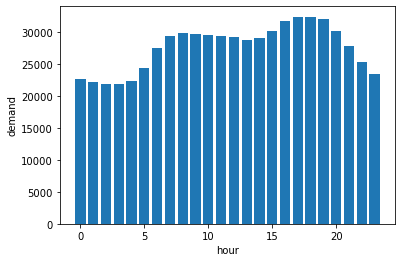

In [20]:
#
plt.bar(hour,avg_demand)
plt.xlabel('hour')
plt.ylabel('demand')

In [21]:
groups = df.groupby(times)

In [22]:
mean = []
dates = []
for i in range(1, 14):
    for j in range(24):
        data = df.set_index('measurement_time')['2021-09-'+ str(i) +' ' + str(j)+':00:00' : '2021-09-' + str(i) +' ' + str(j)+':59:59']
        mean.append(data["demand_level"].mean())

In [23]:
#data.set_index('demand_level')

In [24]:
#data

In [25]:
#print(mean)

In [26]:
mean = [x for x in mean if math.isnan(x) == False]
#print(mean)

In [27]:
len(mean)

311

In [28]:
days_hour = list(range(len(mean)))

#print(days_hour)



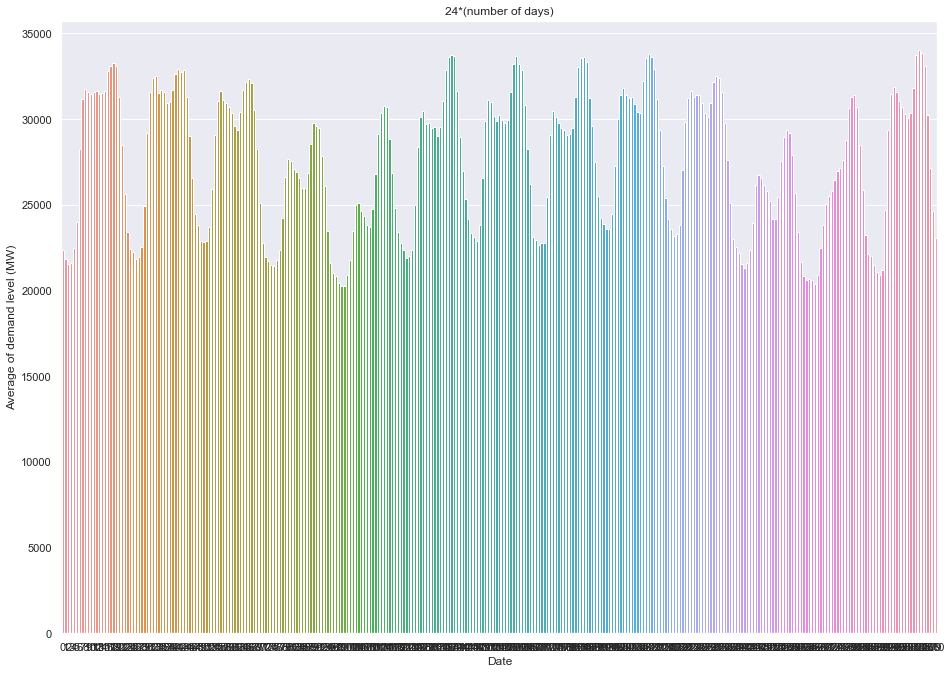

In [29]:
sns.set(rc={'figure.figsize':(15.7,11.27)})
sns.barplot(x=days_hour,y=mean )
#sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.title('24*(number of days)')

plt.xticks(days_hour)
plt.xlabel('Date')
plt.ylabel('Average of demand level (MW)')
plt.show()
